In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Review of Week 6

### October 11th

- Polynomial Interpolation: Degree $n$ polynomial passing through $n+1$ points

$$
\begin{bmatrix}
1 & x_0 & \dots & x_0^{n-1} & x_0^n \\
1 & x_1 & \dots & x_1^{n-1} & x_1^n \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
1 & x_n & \dots & x_n^{n-1} & x_n^n
\end{bmatrix}
\begin{bmatrix}
c_0 \\ c_1 \\ \vdots \\ c_n
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\ y_1 \\ \vdots \\ y_n
\end{bmatrix}
$$

- Linear Least Squares: Best fit line through $n+1$ points

  $$X^TX  \left[\begin{array}{c}
      a \\ b
  \end{array}\right]=X^TY$$

In [27]:
A = np.matrix([1,2,3])

A, A.T, A.reshape(3,1), A.reshape(1,3), type(A)

(matrix([[1, 2, 3]]),
 matrix([[1],
         [2],
         [3]]),
 matrix([[1],
         [2],
         [3]]),
 matrix([[1, 2, 3]]),
 numpy.matrix)

In [29]:
vandermond = lambda xs,n: np.matrix([[x**i for i in range(n)] for x in xs])

In [203]:
N = 20

xs = np.linspace(0, 0.6, N)
ys = np.sin(2*np.pi*xs) + 0.2*np.random.randn(N)

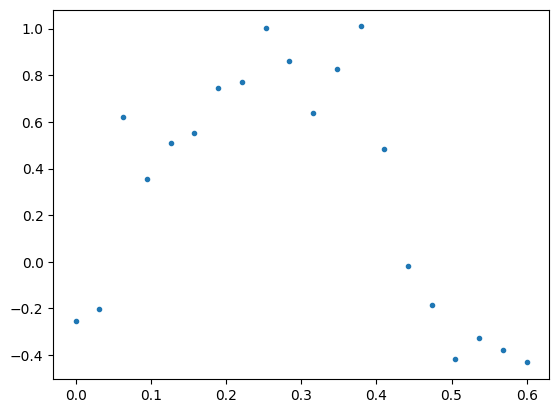

In [204]:
plt.plot(xs, ys, '.')

In [208]:
V = vandermond(xs, len(xs))

c = np.linalg.solve(V, ys)

In [206]:
def poly(c,x):
    if x is np.ndarray:
        return np.array([sum([c[i]*x**i for i in range(len(c))]) for x in x])
    return sum([c[i]*x**i for i in range(len(c))])

(-1.5, 1.5)

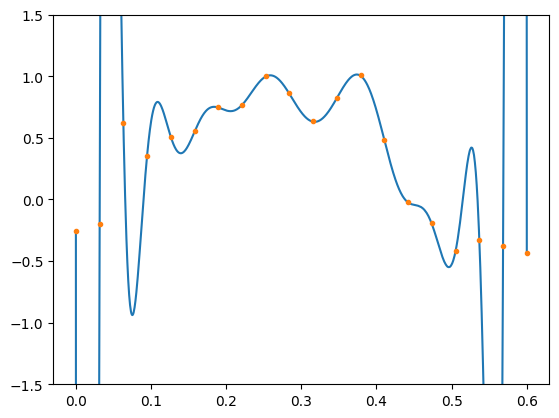

In [207]:
x_range = np.linspace(0, 0.6, 1000)
y_range = poly(c, x_range)

plt.plot(x_range, y_range)
plt.plot(xs, ys, '.')
plt.ylim(-1.5, 1.5)

In [246]:
def interpolate(f, n, bounds=[0,1], lims=[-1.5,1.5]):
    vandermond = lambda xs,n: np.matrix([[x**i for i in range(n)] for x in xs])
    def poly(c,x):
        if x is np.ndarray:
            return np.array([sum([c[i]*x**i for i in range(len(c))]) for x in x])
        return sum([c[i]*x**i for i in range(len(c))])
    
    xs = np.linspace(*bounds, n)
    ys = f(xs) + 0.2*np.random.randn(n)

    V = vandermond(xs, len(xs))
    c = np.linalg.solve(V, ys)
    
    x_range = np.linspace(*bounds, 1000)
    y_range = poly(c, x_range)

    plt.plot(x_range, y_range)
    plt.plot(xs, ys, '.')
    plt.ylim(*lims)
    plt.show()    

    return c

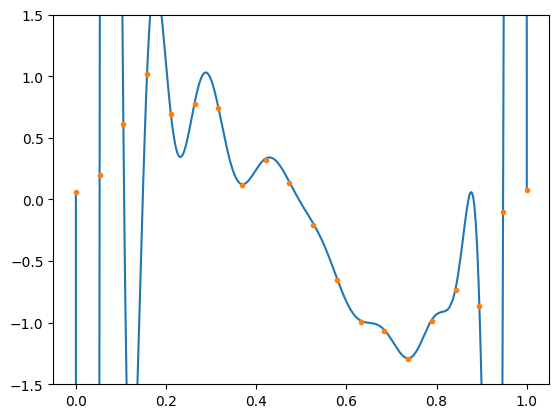

In [247]:
interpolate(lambda x: np.sin(2*np.pi*x), 20, bounds=[0,1])

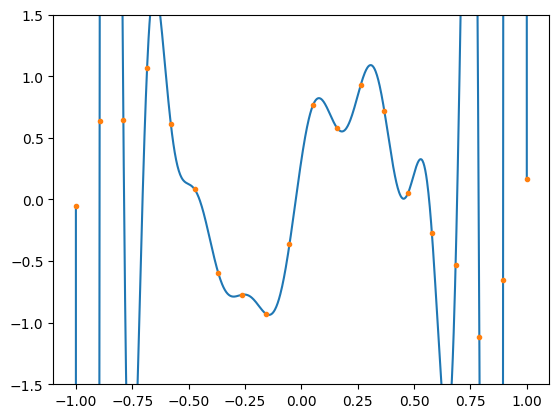

In [248]:
interpolate(lambda x: np.sin(2*np.pi*x), 20, bounds=[-1,1])

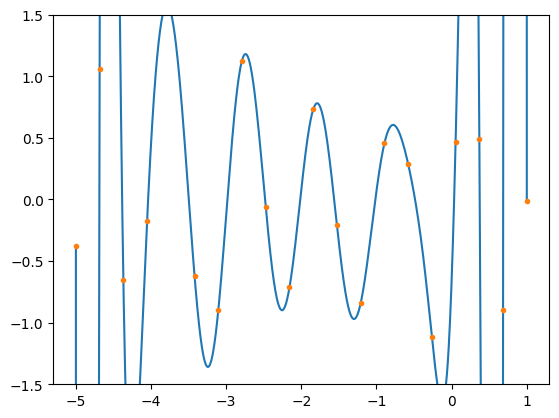

In [249]:
interpolate(lambda x: np.sin(2*np.pi*x), 20, bounds=[-5,1])

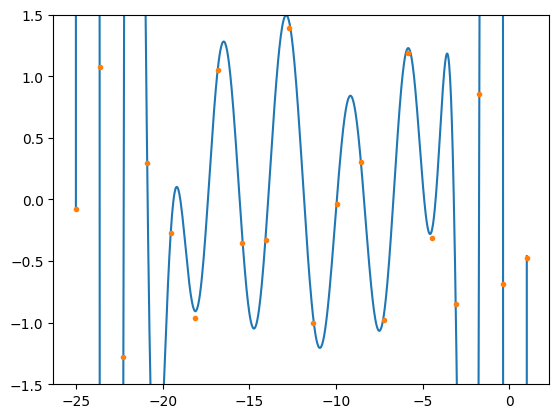

In [250]:
interpolate(lambda x: np.sin(2*np.pi*x), 20, bounds=[-25,1])

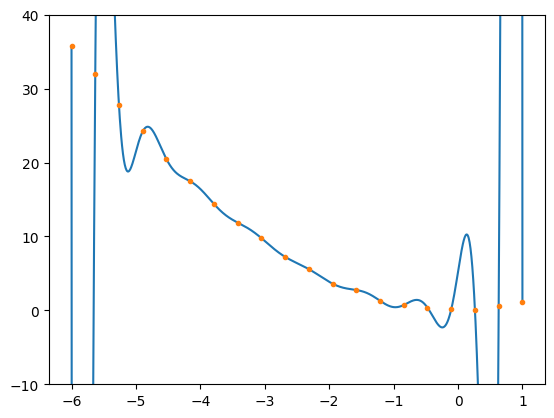

In [255]:
interpolate(lambda x: x**2, 20, bounds=[-6,1], lims=[-10,40])

In [351]:
def llsq(X, y):
    return np.linalg.solve(X.T@X, X.T@y)

In [355]:
N = 40

xs = np.random.rand(N)

X = np.array([xs, np.ones(N)]).T

ys = 2*xs + 0.4*np.random.randn()*np.random.randn(N)

c = llsq(X,ys)

In [356]:
def line(c,x):
    if x is np.ndarray:
        return np.array([c[0]*x + c[1] for x in x])
    return c[0]*x + c[1]

[0.95745847 0.35929701 0.81171041 0.44419049 0.54355262 0.25442731
 0.38744022 0.82354559 0.54346446 0.16305532 0.9628649  0.50456612
 0.83318581 0.22962332 0.71722719 0.96441114 0.80165433 0.13089019
 0.04307409 0.634425   0.87797092 0.48257703 0.78497542 0.8301428
 0.29795837 0.72830829 0.12130206 0.96868209 0.11506293 0.22051559
 0.93266956 0.66111923 0.17863243 0.31186579 0.00832739 0.33169415
 0.46832445 0.72304535 0.71817551 0.85590297]


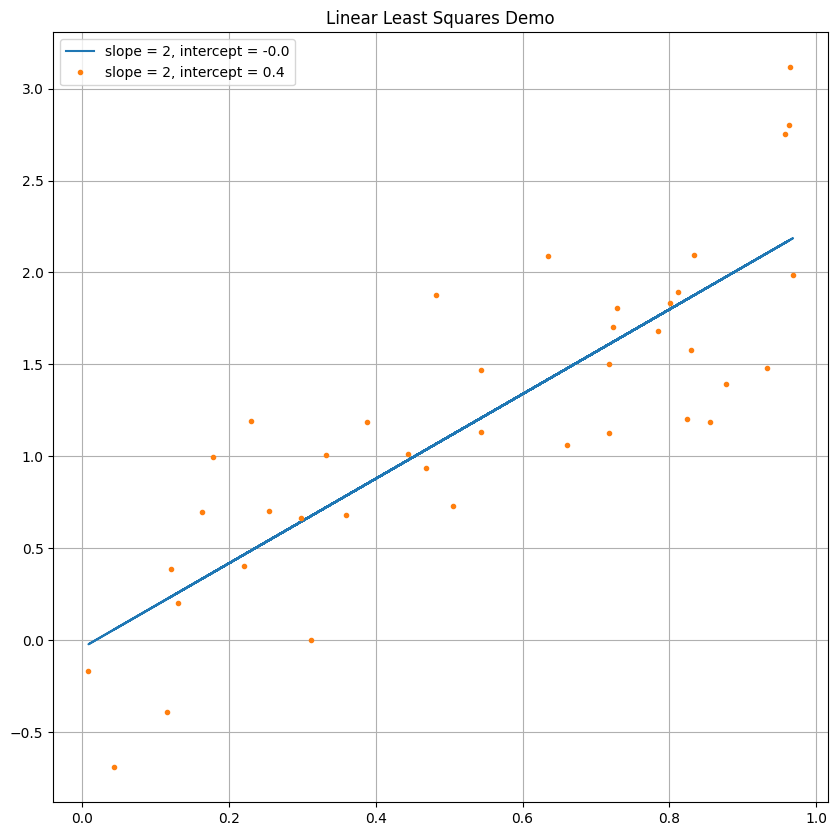

In [371]:
plt.figure(figsize=(10,10))
plt.title('Linear Least Squares Demo')
plt.plot(xs, line(c, xs), label=f'slope = {c[0]:0.0f}, intercept = {c[1]:0.1f}')
plt.plot(xs, ys, '.', label='slope = 2, intercept = 0.4')
# plt.axis('equal')
plt.grid()
plt.legend()
# plt.xlim(0,1)
print(xs)

In [386]:
def llsq(pts):
    if pts is not np.ndarray:
        pts = np.array(pts).T
    X = np.array([pts[:,0], np.ones(N)]).T

    ys = pts[:,1]

    c = np.linalg.solve(X.T@X, X.T@ys)

    plt.title('Linear Least Squares Demo')
    plt.plot(xs, line(c, xs), label=f'slope = {c[0]:0.0f}, intercept = {c[1]:0.1f}')
    plt.plot(xs, ys, '.', label='data')
    plt.grid()
    plt.legend()
    return c

array([ 4.83116381, -4.07651838])

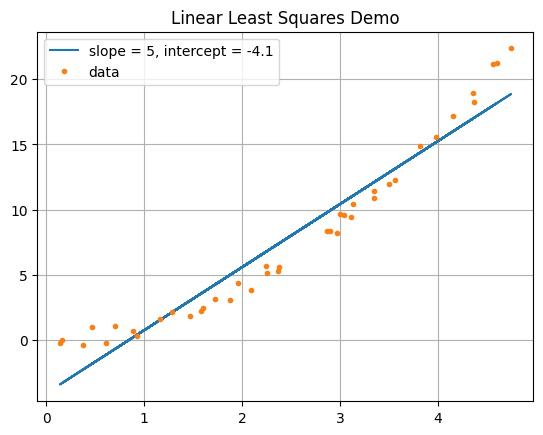

In [388]:
xs = np.random.rand(N)*5
ys = xs**2 + 0.4*np.random.randn(N)

llsq([xs,ys])